#Analyse Donnees





In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('/content/sample_data/amazon.csv')
print(data.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


# 1) Top 5 categories

<ipython-input-13-ff2d39e266b8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=res.index, y=res.values, palette="bright")


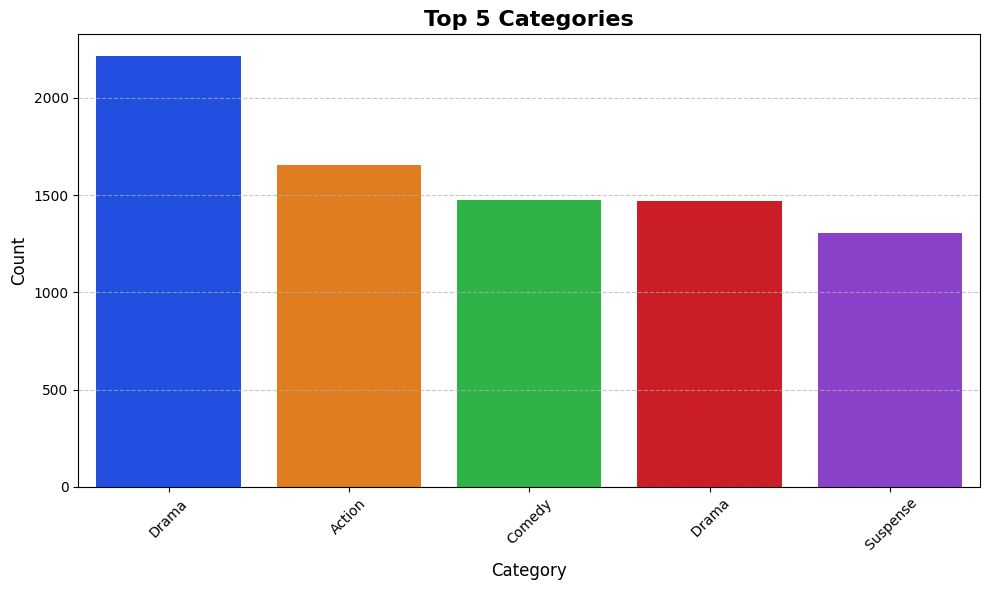

In [13]:
cat = data["listed_in"].apply(lambda c: pd.Series(c.split(","))).stack().reset_index(drop=True)
res = cat.value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=res.index, y=res.values, palette="bright")
plt.title('Top 5 Categories', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#2)Top 5 directors


<ipython-input-14-8d0c2bcfe3c9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dir.index, y=dir.values, palette="bright")


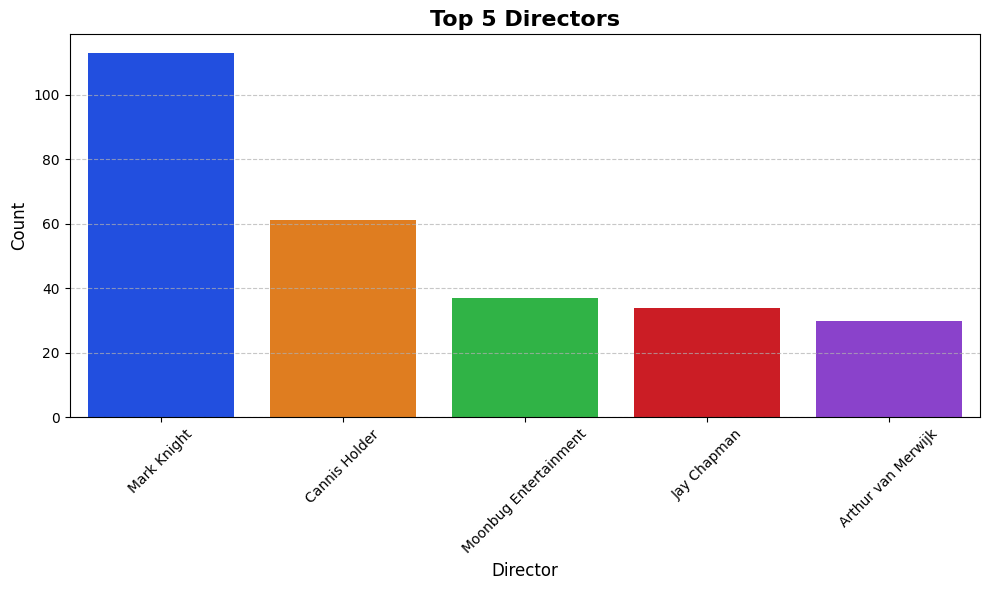

In [14]:
dir = data['director'].apply(lambda d: pd.Series(d).value_counts()).sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=dir.index, y=dir.values, palette="bright")
plt.title('Top 5 Directors', fontsize=16, fontweight='bold')
plt.xlabel('Director', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3) Top 10 actors


<ipython-input-15-703facd462f4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=res.values, y=res.index, palette="bright")


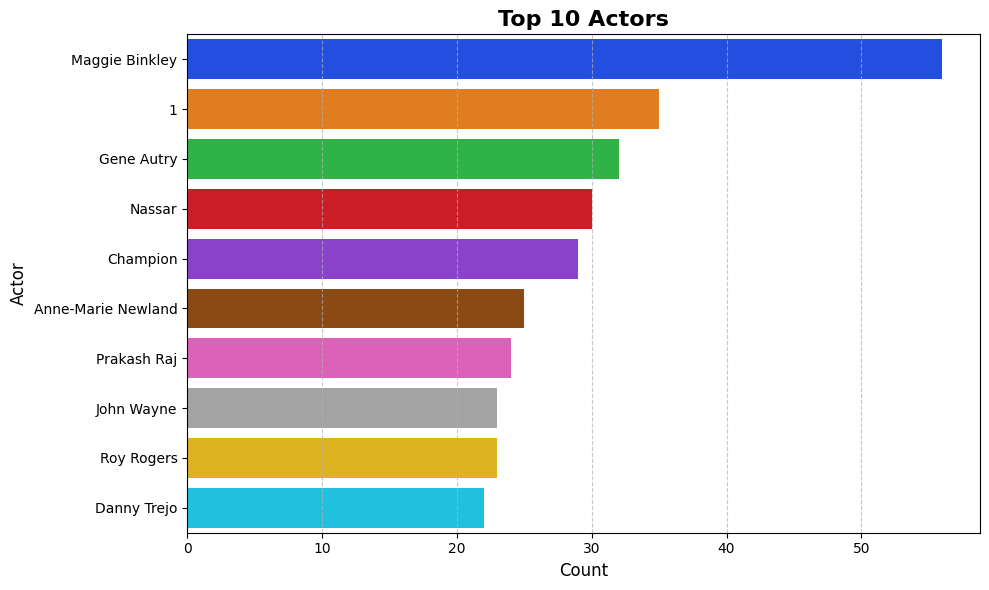

In [15]:
actors = data['cast'].str.split(', ', expand=True).stack().value_counts()
res = actors.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=res.values, y=res.index, palette="bright")
plt.title('Top 10 Actors', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Actor', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4) Les cinq meilleures séries télévisées avec le plus grand nombre de saisons.

<ipython-input-16-aab38665adf6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='duration', y='title', data=tv_shows, palette='pastel', inner='point')


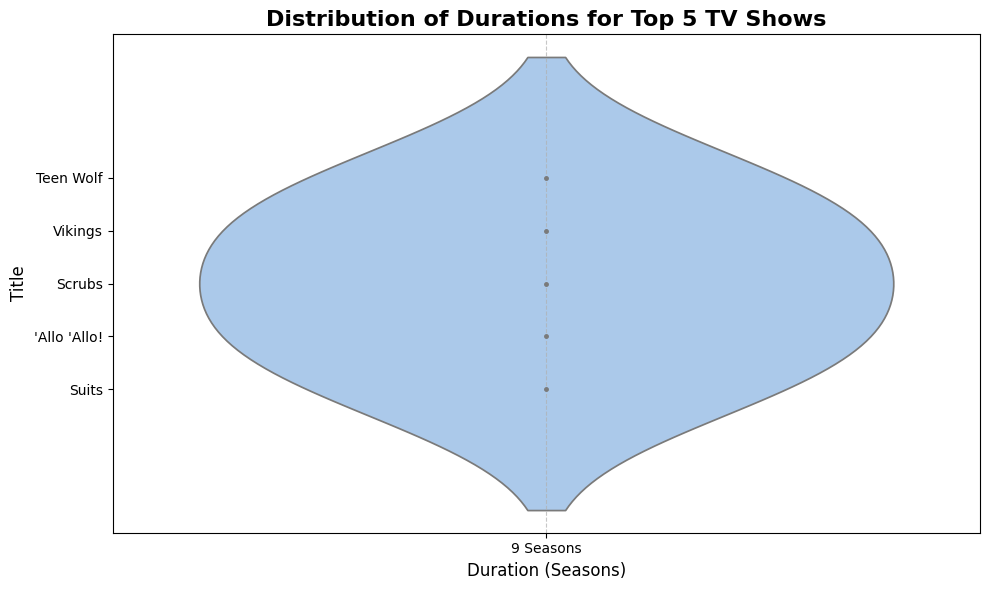

In [16]:
tv_shows = data[data['type'] == 'TV Show']
tv_shows = tv_shows.sort_values('duration', ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.violinplot(x='duration', y='title', data=tv_shows, palette='pastel', inner='point')
plt.title('Distribution of Durations for Top 5 TV Shows', fontsize=16, fontweight='bold')
plt.xlabel('Duration (Seasons)', fontsize=12)
plt.ylabel('Title', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5) Identifier des contenus similaires en faisant correspondre des caractéristiques textuelles

In [37]:

mafia_related = []

for i, rowi in data.iterrows():
    if 'mafia' in rowi['description'].lower():
        mafia_related.append(rowi['title'])

if mafia_related:
    print("Shows or movies related to the mafia:")
    for title in mafia_related:
        print(title)
else:
    print("No shows or movies related to the mafia found.")


Shows or movies related to the mafia:
The Return 2020
Sticky Fingers
Shivaay
Saaho (Telugu)
Saaho (Tamil)
Saaho (Malayalam)
Saaho (Kannada)
Rustum
DSP DEV
Dassehra
_DUPE_The Making of the Mob: Chicago
Sweet Karma
Officer
Chelli Kosam
Loaded Dice
Glitch!
Mardaani
Snitch'd
Teachers in Law
Payback
The Thieves Code
The Ark of Disperata
Copper Bill
Satru
We Still Kill the Old Way
Singam123
Killing Byron Bravo
The Chinese Caper
Partners
Emerald Run
McMafia
Black Easter
Patra Vaitha Nerupondru
American Me
Elfette Saves Christmas
Corrado
Survival Games
Whitefolks
The Hunter
Criminal Mind
Made in Chinatown


# 6) Amazonse concentre-t-il davantage sur les séries télévisées que sur les films ces dernières années ?

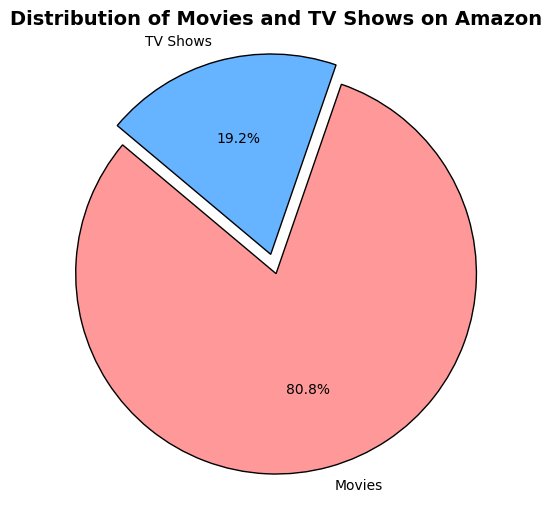

In [23]:
movies = data[data['type'] == 'Movie']
tv_shows = data[data['type'] == 'TV Show']
count = [len(movies), len(tv_shows)]
labels = ['Movies', 'TV Shows']
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)
plt.figure(figsize=(6, 6))
plt.pie(count, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Movies and TV Shows on Amazon', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

# 7) Top countries

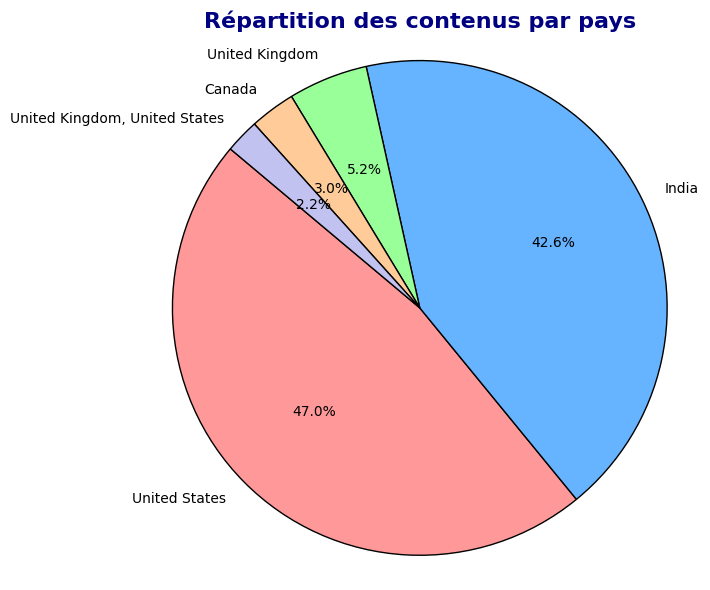

In [24]:
top_countries = data['country'].value_counts().head()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
plt.figure(figsize=(7, 6))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=140, colors=colors,  wedgeprops={'edgecolor': 'black'})
plt.title('Répartition des contenus par pays', fontsize=16, fontweight='bold', color='navy')
plt.axis('equal')
plt.tight_layout()
plt.show()